# Estatística Correlação e Regressão Simples/Multivariada - Desafio Final

Bootcamp Data Analytics 2024

*Autor: Letícia Simões*

## Bibliotecas

In [265]:
# Bibliotecas usadas
import pandas            as pd
import numpy             as np
import statsmodels.api   as sm
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats

## Proposta do Desafio - Parte I

**Considerando a base de dados `kc_house_data.csv` responda às questões de 01 a 06 abaixo:**

### Conhecendo a base de dados

In [266]:
# Importação da base de dados
df_house = pd.read_csv('kc_house_data.csv')

# Visualizando os dados
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [267]:
# Tipos de variáveis
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [268]:
# Estatísticas descritivas das variáveis numéricas
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [269]:
# Estatísticas descritivas das variáveis categóricas
df_house.describe(include=['object'])

,date,waterfront
count,9999,9999
unique,351,2
top,20140623T000000,n
freq,75,9920


In [270]:
# Valores faltantes
df_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exercício 01.

**Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço (`price`) e o número de quartos (`bedrooms`)? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total (`sqft_living`) superior a 2000 pés (aprox. 610 m) quadrados?**

#### Código

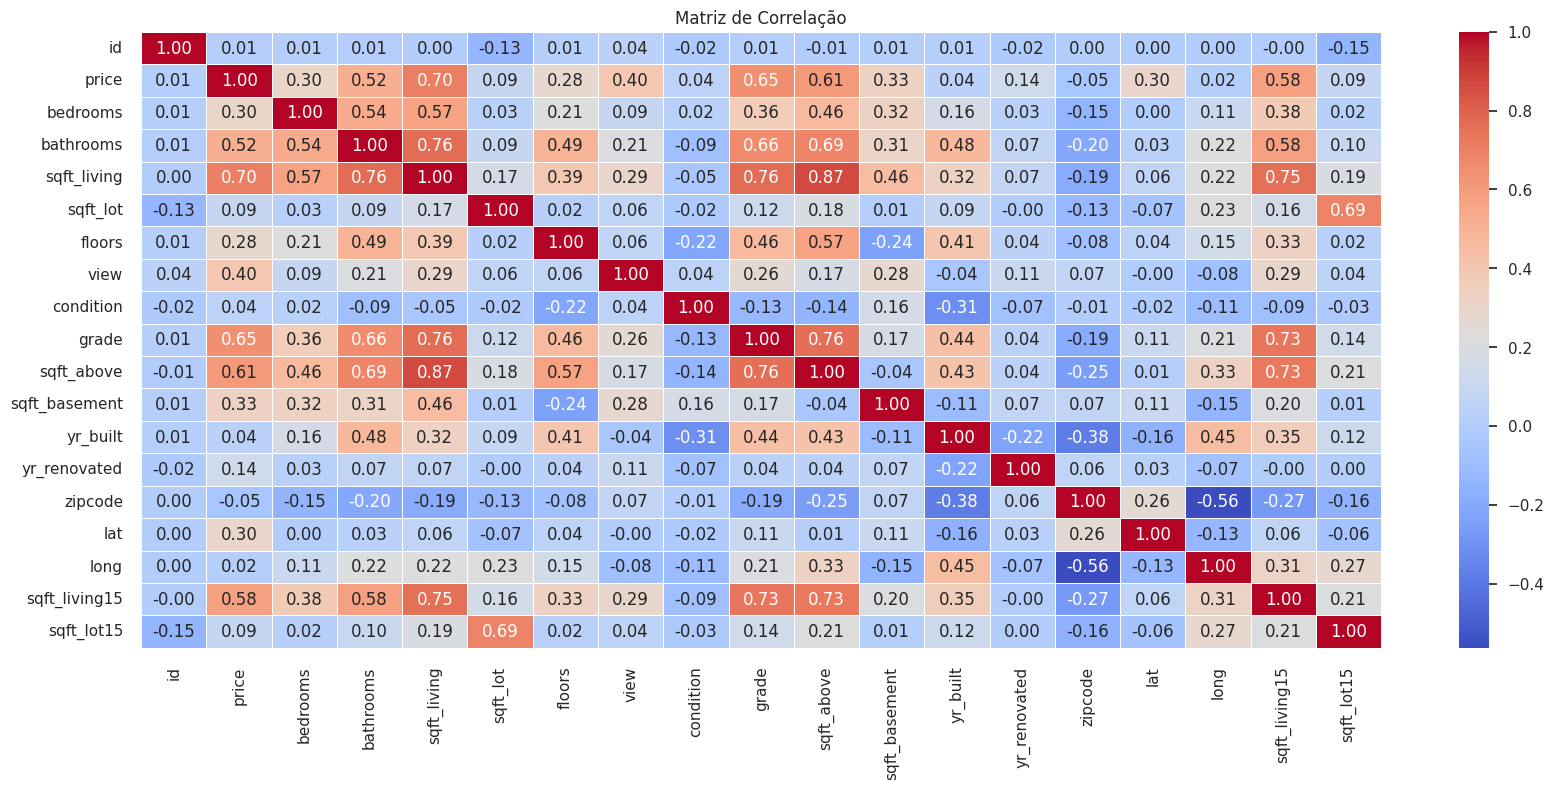

In [271]:
# Seleciona variáveis numéricas
df_num_house = df_house.select_dtypes(include=['float64', 'int64'])

# Calcula matriz de correlação
corr_house = df_num_house.corr()

# Plot
plt.figure(figsize=(20, 8))
sns.heatmap(corr_house, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

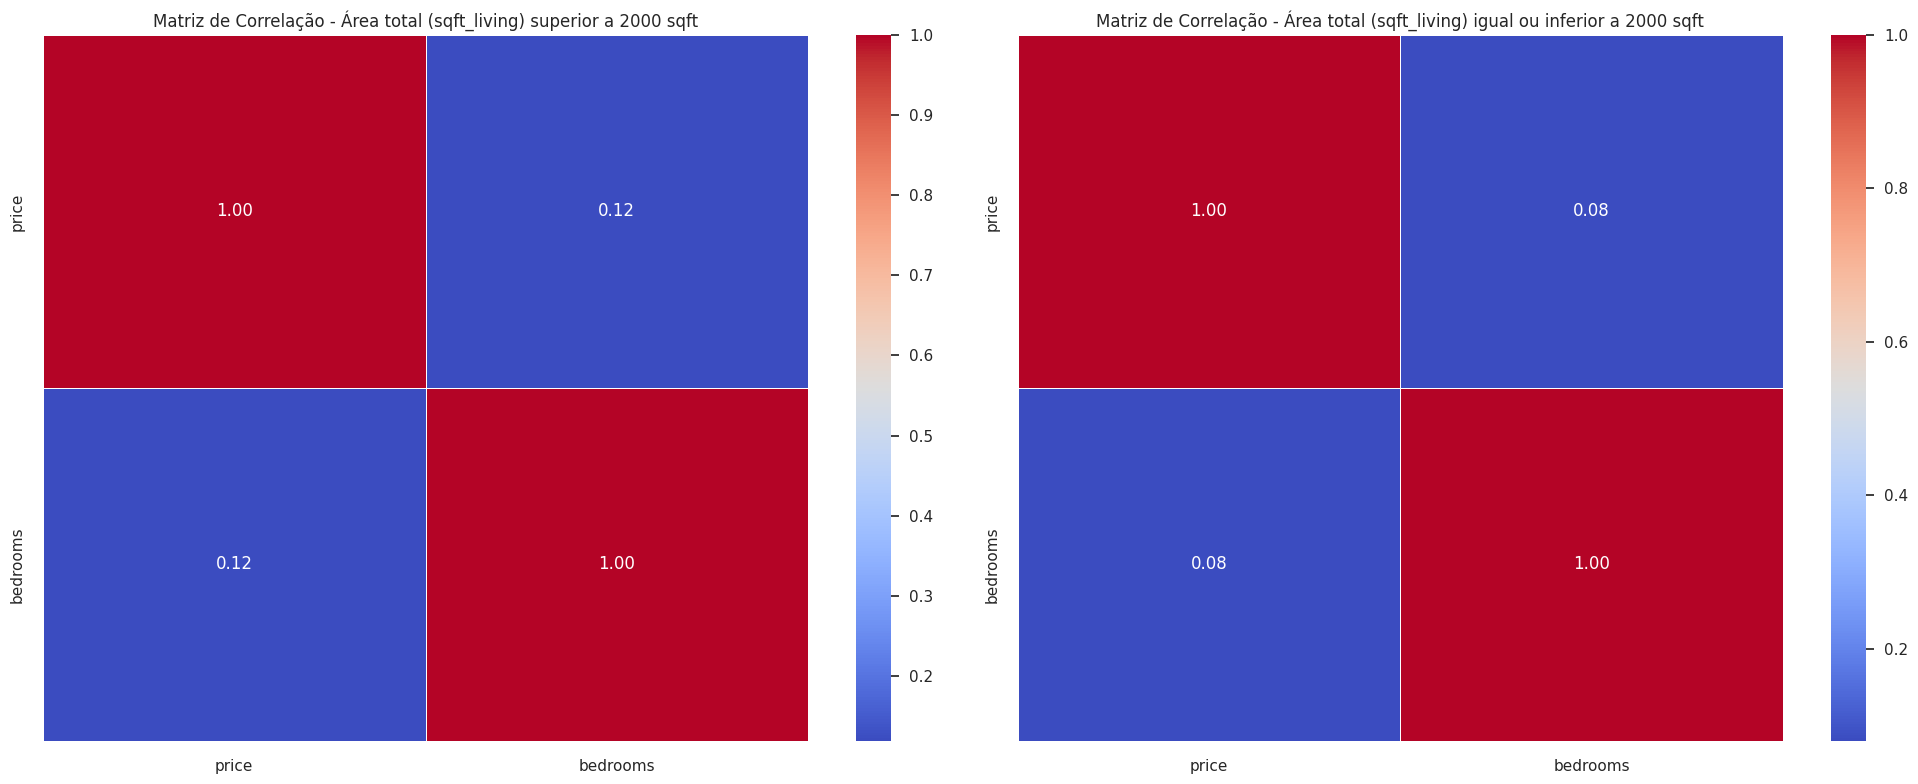

In [272]:
# Filtra DataFrame - Apenas imóveis cuja área total (sqft_living) é superior a 2000
df_above_2000 = df_num_house[df_num_house['sqft_living'] > 2000]

# Filtra DataFrame - Apenas imóveis cuja área total (sqft_living) é igual ou inferior a 2000
df_below_2000 = df_num_house[df_num_house['sqft_living'] <= 2000]

# Calcula matriz de correlação
corr_above_2000 = df_above_2000[['price', 'bedrooms']].corr()
corr_below_2000 = df_below_2000[['price', 'bedrooms']].corr()

# Plot - Superior
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(corr_above_2000, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Área total (sqft_living) superior a 2000 sqft')

# Plot - Igual ou inferior
plt.subplot(1, 2, 2)
sns.heatmap(corr_below_2000, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Área total (sqft_living) igual ou inferior a 2000 sqft')

plt.tight_layout()
plt.show()

#### **Conclusão:**

A correlação entre o preço e o número de quartos de um imóvel no conjunto de dados é de 0.3, o que sugere uma correlação fraca, porém positiva, entre essas variáveis. Isso sugere que, em geral, à medida que o número de quartos aumenta, o preço do imóvel tende a aumentar também, embora essa relação não seja muito forte.

Quando consideramos apenas imóveis com uma área total superior a 2000 pés quadrados, o coeficiente de correlação entre o preço e o número de quartos diminui para 0.12. Isso indica que a relação entre o preço e o número de quartos é ainda mais fraca para imóveis maiores.

### Exercício 02.

**Existe alguma correlação entre o preço (`price`) e a área total da casa (`sqft_living`), considerando apenas casas com pelo menos dois banheiros (`bathrooms`)?**

#### Código:

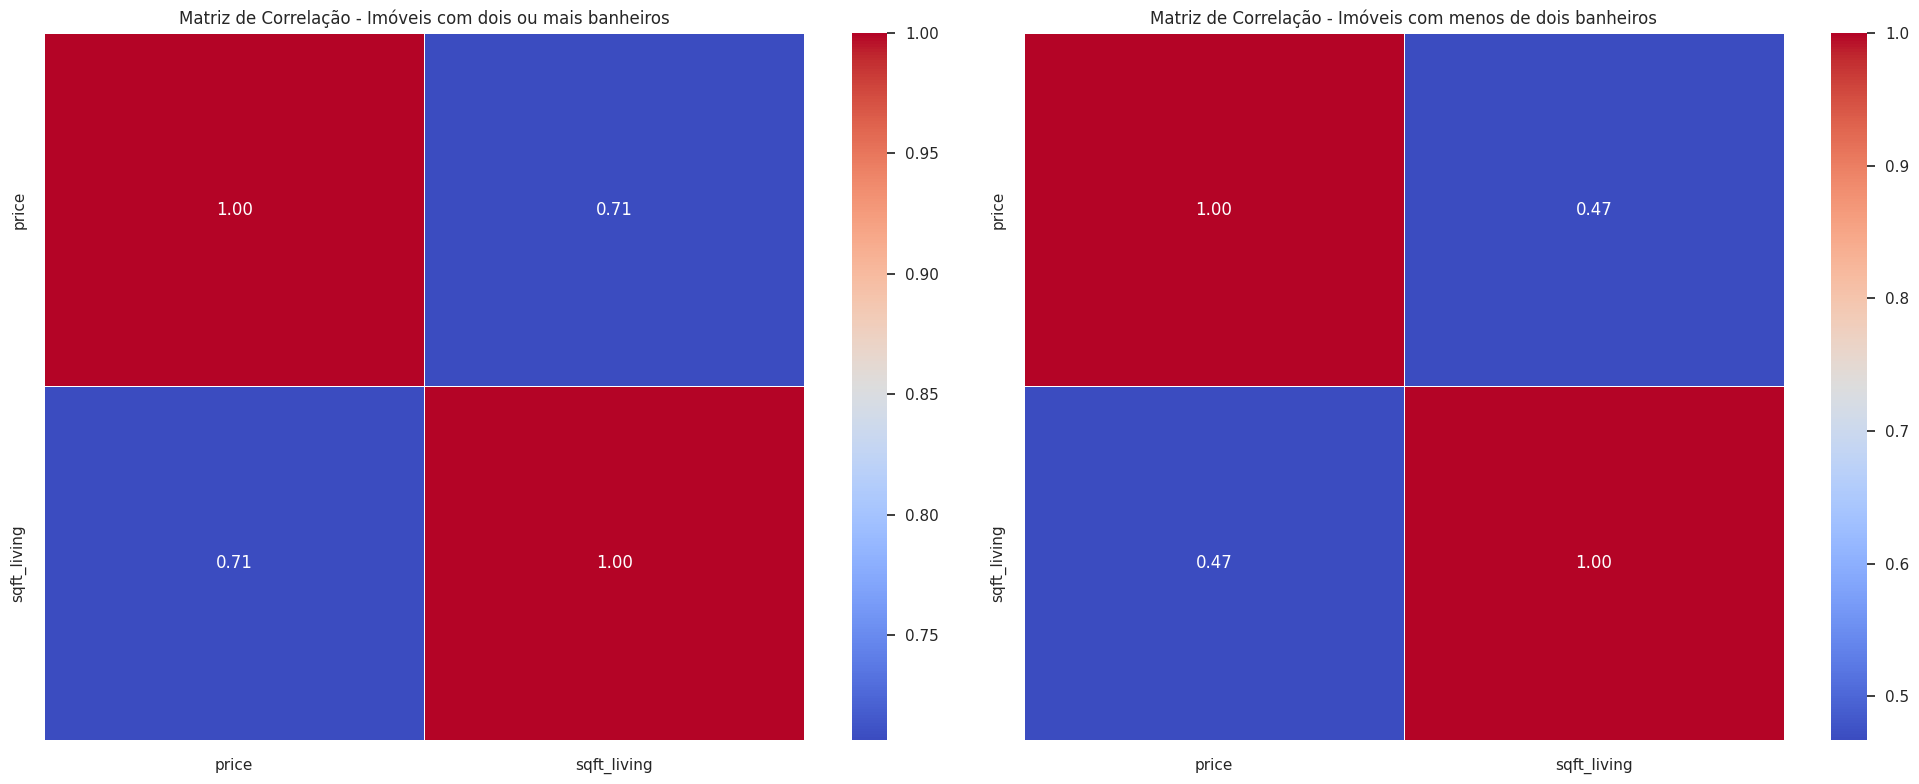

In [273]:
# Filtra DataFrame - Apenas imóveis com dois ou mais banheiros
df_above2_bathrooms = df_num_house[df_num_house['bathrooms'] >= 2]

# Filtra DataFrame - Somente imóveis com menos de dois banheiros.
df_below2_bathrooms = df_num_house[df_num_house['bathrooms'] < 2]

# Calcula matriz de correlação
corr_above2_bathrooms = df_above2_bathrooms[['price', 'sqft_living']].corr()
corr_below2_bathrooms = df_below2_bathrooms[['price', 'sqft_living']].corr()

# Plot - Superior
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(corr_above2_bathrooms, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Imóveis com dois ou mais banheiros')

# Plot - Igual ou inferior
plt.subplot(1, 2, 2)
sns.heatmap(corr_below2_bathrooms, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Imóveis com menos de dois banheiros')

plt.tight_layout()
plt.show()

In [274]:
# Modelo de Regressão
X = sm.add_constant(df_above2_bathrooms['sqft_living'])
y = df_above2_bathrooms['price']

# Fit do modelo
model = sm.OLS(y, X).fit()

# Visualização do Modelo de Regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     5775.
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        23:53:36   Log-Likelihood:                -81484.
No. Observations:                5790   AIC:                         1.630e+05
Df Residuals:                    5788   BIC:                         1.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.266e+05    1.2e+04    -18.816      

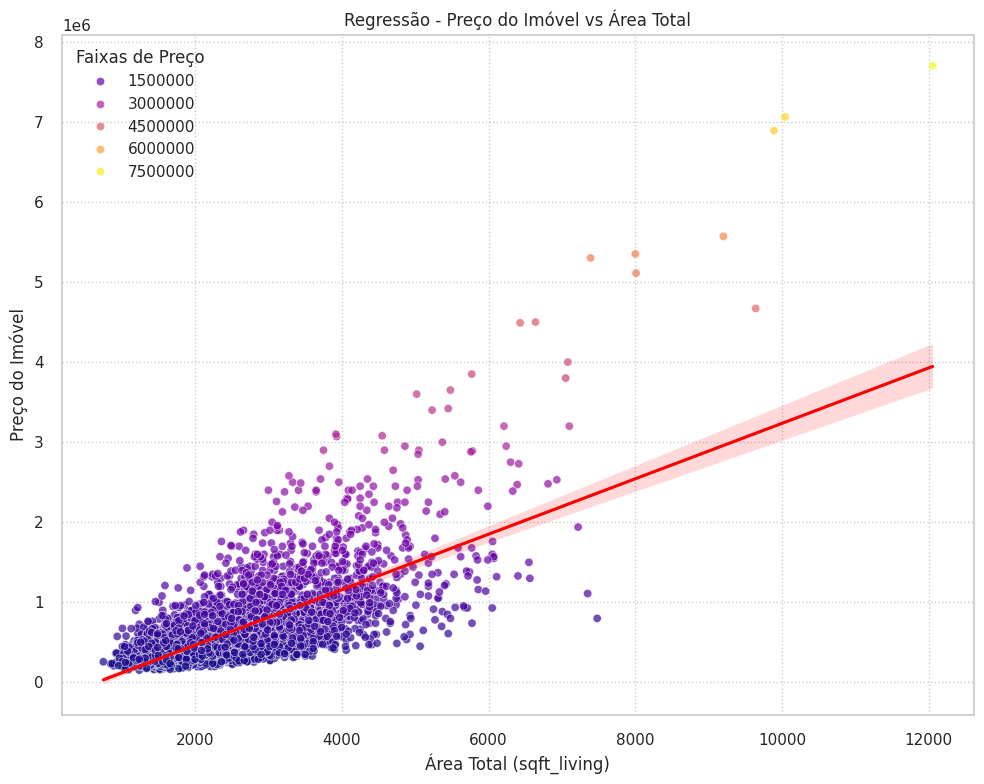

In [275]:
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_above2_bathrooms, x='sqft_living', y='price',  hue='price', palette='plasma', alpha=0.7)
sns.regplot(data=df_above2_bathrooms, x='sqft_living', y='price', scatter=False, color='red')
plt.title('Regressão - Preço do Imóvel vs Área Total')
plt.xlabel('Área Total (sqft_living)')
plt.ylabel('Preço do Imóvel')
plt.legend(title='Faixas de Preço')

plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

#### **Conclusão:**

No conjunto geral, observei uma forte correlação positiva de 0.70 entre o preço do imóvel e sua área total (`sqft_living`). Isso indica que, em geral, à medida que a área total do imóvel aumenta, seu preço também tende a aumentar.

Ao restringir minha análise aos imóveis com pelo menos dois banheiros, notei um leve aumento no coeficiente de correlação para 0.71. Isso sugere que, para imóveis com mais banheiros, a correlação entre o preço e a área total é ligeiramente maior em comparação com o conjunto de dados geral. Isso indica uma influência maior da área total no preço dos imóveis com mais banheiros.

Se considerar apenas os imóveis com 1 ou menos banheiros, o coeficiente de correlação diminui para 0.47. Isso sugere que, para imóveis com menos banheiros, a relação entre o preço e a área total é menos forte do que para o conjunto de dados geral. Isso pode indicar que, para esse subconjunto de imóveis, outros fatores, como localização ou características específicas, podem ter uma influência maior no preço, em contraste com a área total.

### Exercício 03.

**Como a quantidade de banheiros (`bathrooms`) influência na correlação entre a área total da casa (`sqft_living`) e o preço (`price` )?**

#### Código:

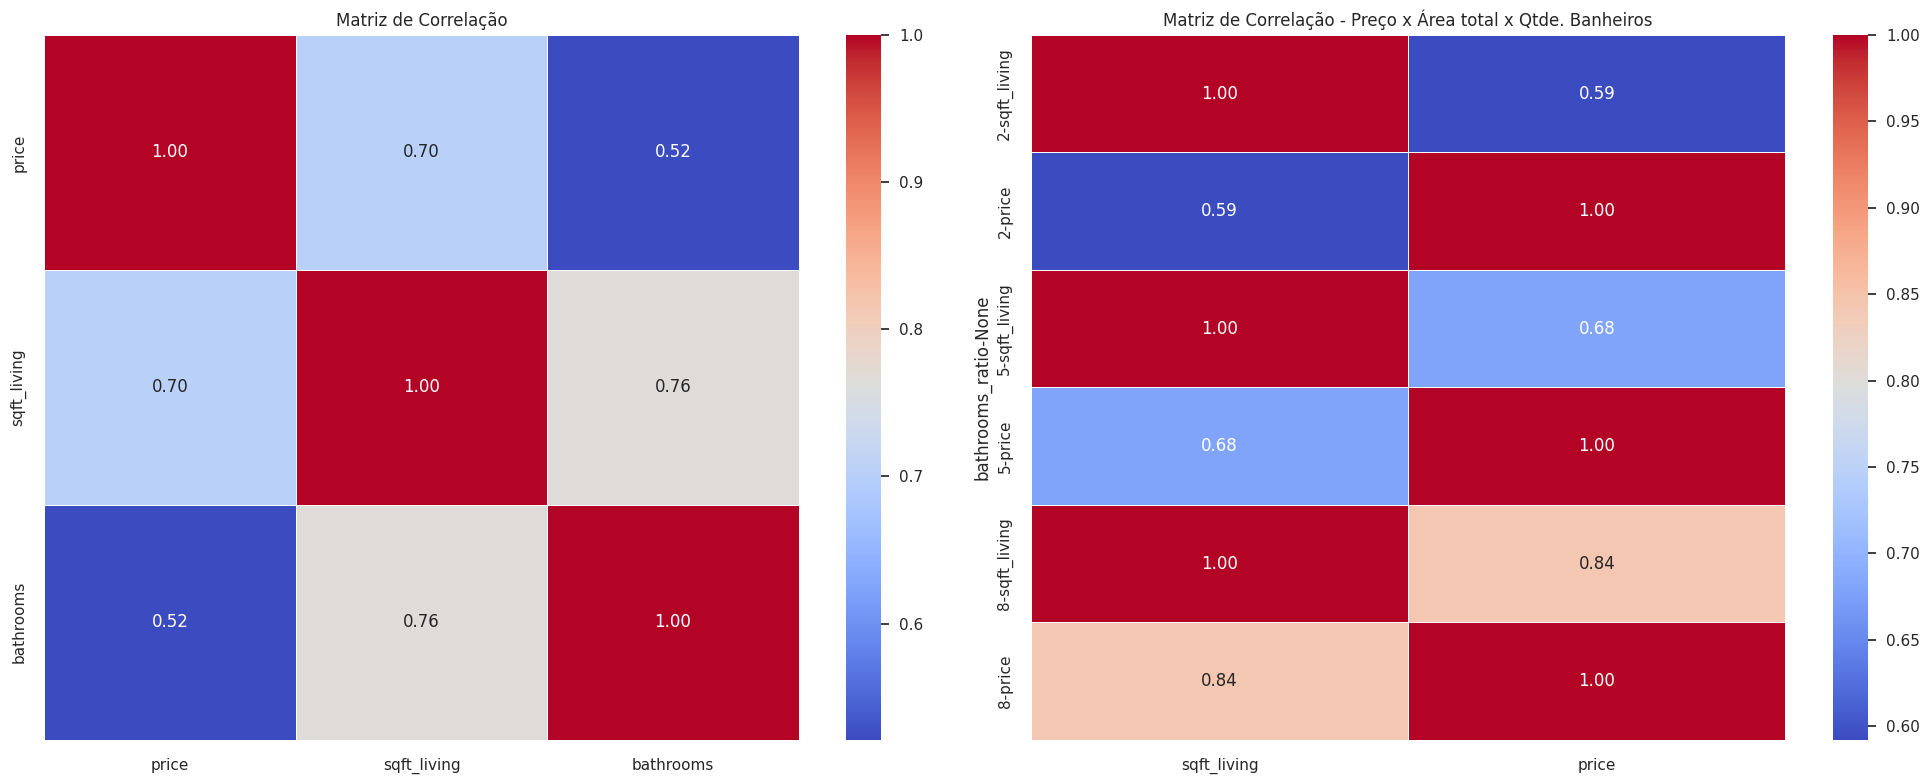

In [276]:
# Calcula matriz de correlação geral
corr_bathrooms_sqft_living_price = df_num_house[['price', 'sqft_living', 'bathrooms']].corr()

# Cópia do DataFrame original para não modificá-lo
df_house_new = df_house.copy()

# Função para agrupar a quantidade de banheiros
def group_bathrooms(bathrooms):
  if 0 <= bathrooms < 3:
    return 2
  elif 3 <= bathrooms < 6:
    return 5
  elif 6 <= bathrooms <= 8:
    return 8
  else:
    return 9

# Criar nova coluna 'bathrooms_ratio'
df_house_new['bathrooms_ratio'] = df_house_new['bathrooms'].apply(group_bathrooms)

# Calcula matriz de correlação agrupada
bathrooms_groups = df_house_new.groupby('bathrooms_ratio')
corr_bathrooms_groups = bathrooms_groups[['sqft_living', 'price']].corr()

# Plot - Correlação Geral
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(corr_bathrooms_sqft_living_price, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')

# Plot - Correlação Agrupada
plt.subplot(1, 2, 2)
sns.heatmap(corr_bathrooms_groups, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Preço x Área total x Qtde. Banheiros')

plt.tight_layout()
plt.show()

In [277]:
# Modelo de Regressão
selected_variables = ['price'] + ['sqft_living'] + ['bathrooms_ratio']
selected_df = df_house_new[selected_variables]

# Fit do modelo
X = sm.add_constant(selected_df.drop(columns=['price']))
y = selected_df['price']
model = sm.OLS(y, X).fit()

# Visualização do Modelo de Regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     5015.
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        23:53:39   Log-Likelihood:            -1.3910e+05
No. Observations:                9999   AIC:                         2.782e+05
Df Residuals:                    9996   BIC:                         2.782e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.13e+05   7691.771    -

#### **Conclusão:**

Após analisar a matriz de correlação geral, constatei que a quantidade de banheiros está fortemente relacionada tanto à área total do imóvel (correlação de 0.76) quanto ao preço do imóvel (correlação de 0.52).

Investigando mais a fundo, como a quantidade de banheiros afeta a relação entre Área e Preço. Agrupei os imóveis em grupos de 2, 5 e 8 banheiros por imóvel. Em seguida, calculei as matrizes de correlação para cada grupo. Notei que, à medida que a quantidade de banheiros aumenta, a correlação entre o Preço e Área total tende a aumentar também.

Para as casas com 2, 5 e 8 banheiros, as correlações entre o preço e a área total foram, respectivamente, 0.592, 0.681 e 0.843.

Além disso, gerei um modelo de regressão linear para investigar se a quantidade de banheiros influencia na relação entre a área total e o preço do imóvel. Os resultados indicam que tanto a área total quanto a quantidade de banheiros têm uma relação estatisticamente significativa com o preço do imóvel, como evidenciado pelos baixos p-valores associados a essas variáveis. Portanto, podemos rejeitar a hipótese nula de que essas variáveis não têm impacto no preço do imóvel.

Portanto, a variação nos coeficientes de correlação sugere que a presença e o número de banheiros podem afetar a força da relação entre o Preço e a Área total.

### Exercício 04.

**Qual é a relação entre a condição da casa (`condition`) e o preço (`price`), considerando apenas casas com uma área total (`sqft_living`) superior a 3000 pés (aprox. 914 m) quadrados?**

#### Código:

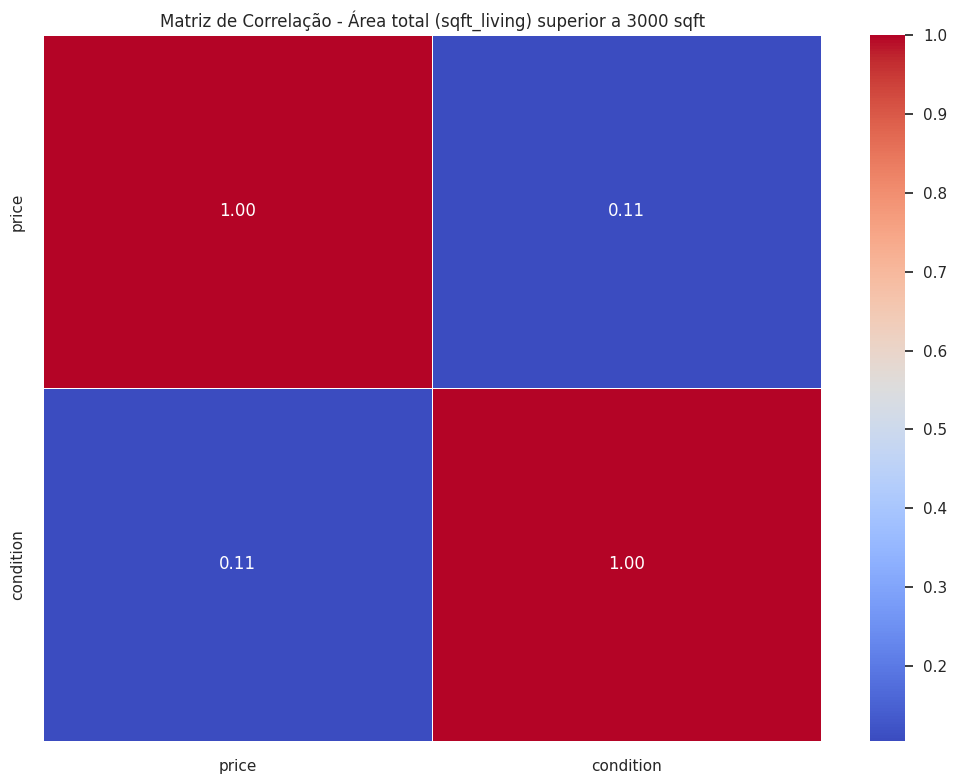

In [278]:
# Filtra DataFrame - Apenas imóveis cuja área total (sqft_living) é superior a 3000
df_above_3000 = df_num_house[df_num_house['sqft_living'] > 3000]

# Calcula matriz de correlação
corr_above_3000 = df_above_3000[['price', 'condition']].corr()

# Plot - Superior
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(corr_above_3000, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Área total (sqft_living) superior a 3000 sqft')
plt.tight_layout()
plt.show()

In [279]:
# Modelo de Regressão
X = sm.add_constant(df_above_3000['condition'])
y = df_above_3000['price']

# Fit do modelo
model = sm.OLS(y, X).fit()

# Visualização do Modelo de Regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.73
Date:                Mon, 13 May 2024   Prob (F-statistic):           0.000130
Time:                        23:53:39   Log-Likelihood:                -19539.
No. Observations:                1316   AIC:                         3.908e+04
Df Residuals:                    1314   BIC:                         3.909e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.635e+05   1.03e+05      6.445      0.0

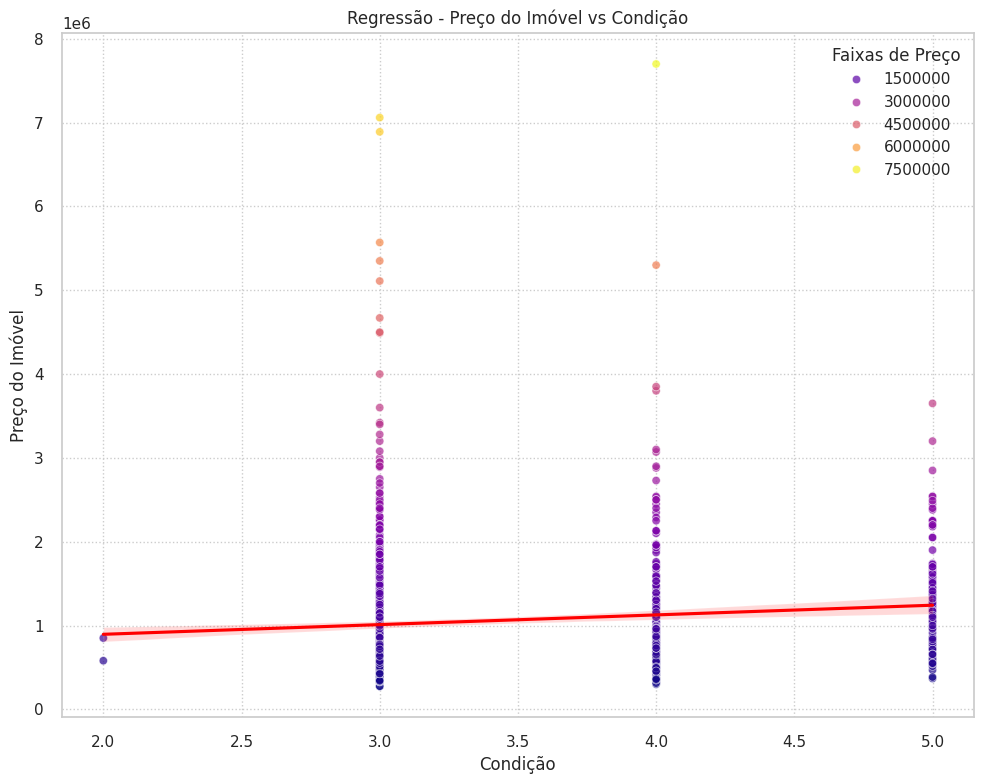

In [280]:
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_above_3000, x='condition', y='price',  hue='price', palette='plasma', alpha=0.7)
sns.regplot(data=df_above_3000, x='condition', y='price', scatter=False, color='red')
plt.title('Regressão - Preço do Imóvel vs Condição')
plt.xlabel('Condição')
plt.ylabel('Preço do Imóvel')
plt.legend(title='Faixas de Preço')

plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

#### **Conclusão:**

Ao examinar a matriz de correlação do conjunto de dados geral, foi observado um coeficiente de correlação baixo (0.04), sugerindo uma correlação fraca entre preço e condição do imóvel. Após filtrar os imóveis com uma área total superior a 3000 pés quadrados, o coeficiente de correlação aumentou para 0.11. No entanto, esse valor ainda não é suficiente para indicar uma correlação forte entre as variáveis preço e condição. Em suma, com base na matriz de correlação, é evidente que as variáveis possuem uma correlação fraca, mesmo quando consideramos a condição apresentada.

Para uma investigação mais aprofundada, foi gerado um modelo de regressão linear, revelando um coeficiente de correlação (R-quadrado) de apenas 0.011. Esse valor de R-quadrado não é satisfatório para determinar uma correlação forte entre as variáveis. Embora o p-valor baixo apresentado no modelo de regressão indicar uma relação estatisticamente significativa entre as variáveis, a porcentagem da variabilidade do preço explicada pelo modelo é muito baixa, sugerindo que outros fatores não incluídos no modelo podem influenciar significativamente o preço do imóvel.

### Exercício 05.
**Existe alguma correlação entre a localização geográfica (`lat`) e (`long`) e o preço (`price`) para casas com pelo menos três quartos (`bedrooms`)?**

#### Código:

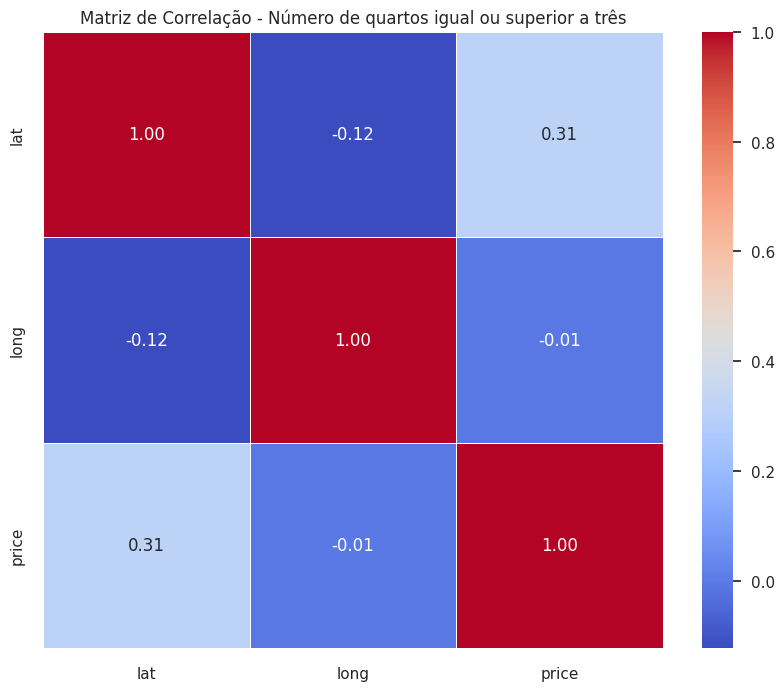

In [281]:
# Filtra DataFrame - Apenas imóveis com três ou mais quartos
df_above3_bedrooms = df_num_house[df_num_house['bedrooms'] >= 3]

# Calcula matriz de correlação
corr_above3_bedrooms = df_above3_bedrooms[['lat', 'long', 'price']].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_above3_bedrooms, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Número de quartos igual ou superior a três')
plt.show()

In [282]:
# Modelo de Regressão
selected_variables = ['price'] + ['lat'] + ['long']
selected_df = df_above3_bedrooms[selected_variables]

# Fit do modelo
X = sm.add_constant(selected_df.drop(columns=['price']))
y = selected_df['price']
model = sm.OLS(y, X).fit()

# Visualização do Modelo de Regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     471.2
Date:                Mon, 13 May 2024   Prob (F-statistic):          6.38e-195
Time:                        23:53:40   Log-Likelihood:            -1.2271e+05
No. Observations:                8612   AIC:                         2.454e+05
Df Residuals:                    8609   BIC:                         2.455e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.991e+07   3.71e+06     -8.060      0.0

#### **Conclusão:**

Ao analisar a matriz de correlação no conjunto de dados abrangente, observei que a relação entre as coordenadas geográficas do imóvel (latitude e longitude) e o preço é fraca, com um coeficiente de correlação de 0.3 para a latitude e 0.02 para a longitude. Ao restringir a análise aos imóveis com pelo menos três quartos, notei um leve aumento na correlação entre o preço e a latitude, atingindo o valor de 0.31, enquanto a correlação entre o preço e a longitude diminuiu para -0.01, sugerindo uma possível correlação negativa entre essas duas variáveis. Para uma investigação mais aprofundada, gerei um modelo de regressão linear multivariada. Neste modelo, observei um coeficiente de correlação (R-quadrado) de apenas 0.011, esse valor não é satisfatório para determinar uma correlação forte entre as variáveis.

### Exercício 06.

**Calcule a correlação entre uma variável categórica (`waterfront`) e uma variável numérica (`price`) usando ANOVA.**

#### Código:

In [307]:
# Definir o valor de Alpha
alpha = 0.05

# Dividir diferentes valores por categoria
waterfront_yes_prices = df_house[df_house['waterfront'] == 'y']['price']
waterfront_no_prices  = df_house[df_house['waterfront'] == 'n']['price']

# Calcular o teste ANOVA
f_stat, p_value = stats.f_oneway(waterfront_yes_prices, waterfront_no_prices)

# Visualização dos resultados
print("P-valor:", p_value)
print("Estatística F:", f_stat)

# Visualização do teste
if p_value < alpha:
    print("Rejeitamos a hipótese nula. O preço está relacionado com o fator beira-mar.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os preços não estão relacionados com o fator beira-mar.")

P-valor: 2.97380815121432e-202
Estatística F: 964.5733248785584
Rejeitamos a hipótese nula. O preço está relacionado com o fator beira-mar.


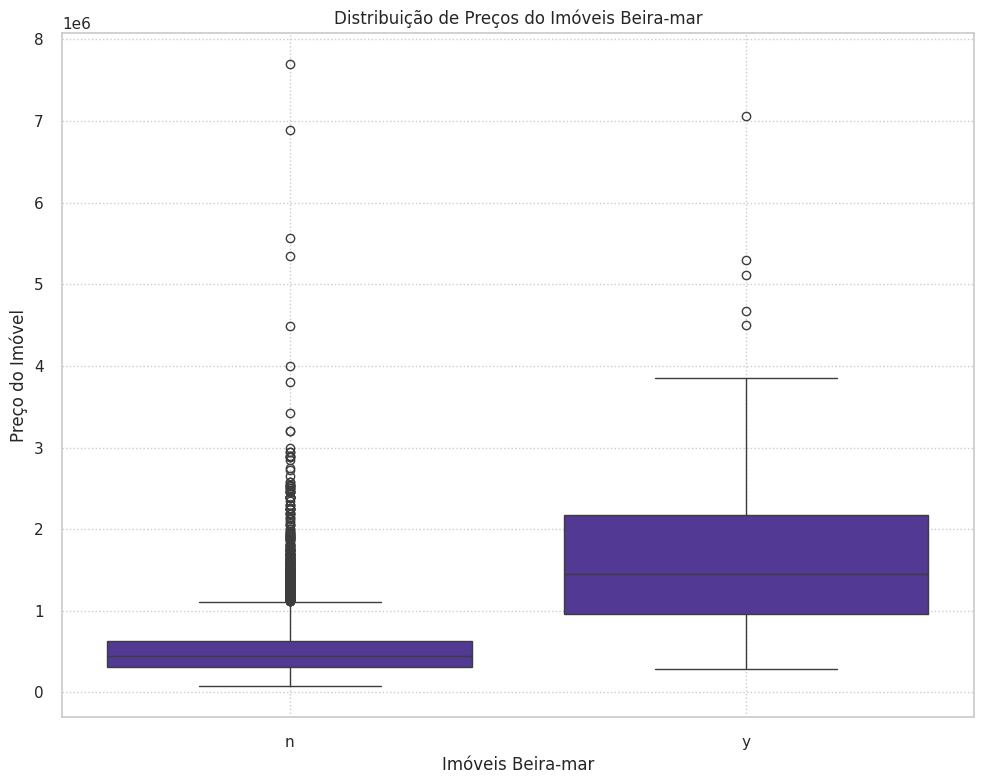

In [284]:
# Plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='waterfront', y='price', data=df_house, color='#4b2aa3')
plt.title('Distribuição de Preços do Imóveis Beira-mar')
plt.xlabel('Imóveis Beira-mar')
plt.ylabel('Preço do Imóvel')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

#### **Conclusão:**

Com base nos resultados do teste ANOVA, onde o P-valor é inferior a 0.05 é possível constatar que há uma diferença estatisticamente significativa nos preços entre os imóveis com e sem vista para o mar. Portanto, há evidências suficientes para afirmar que os preços estão relacionados com o fator beira-mar.

Além disso, através do boxplot, é possível observar que os imóveis beira-mar apresentam uma distribuição de valores mais elevados, indicando um potencial de valorização.

## Proposta do Desafio - Parte II

**Considerando a base de dados `car_price.csv` responda às questões de 07 a 11 abaixo:**

### Conhecendo a base de dados

In [285]:
# Importação da base de dados
df_cars = pd.read_csv('car_price.csv')

# Visualizando os dados
df_cars.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [286]:
# Tipos de variáveis
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [287]:
# Estatísticas descritivas das variáveis numéricas
df_cars.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [288]:
# Estatísticas descritivas das variáveis categóricas
df_cars.describe(include='object')

,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain
count,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874
unique,32,955,7,2,75,16,4,3,104,309,264,3
top,Maruti Suzuki,X1 sDrive20d xLine,Diesel,Manual,Mumbai,White,First,Individual,1197 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD
freq,398,15,954,1037,302,727,1504,1816,230,90,90,1319


In [289]:
# Valores faltantes
df_cars.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

### Exercício 07.

**Codifique e exiba a matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.**

#### Código:

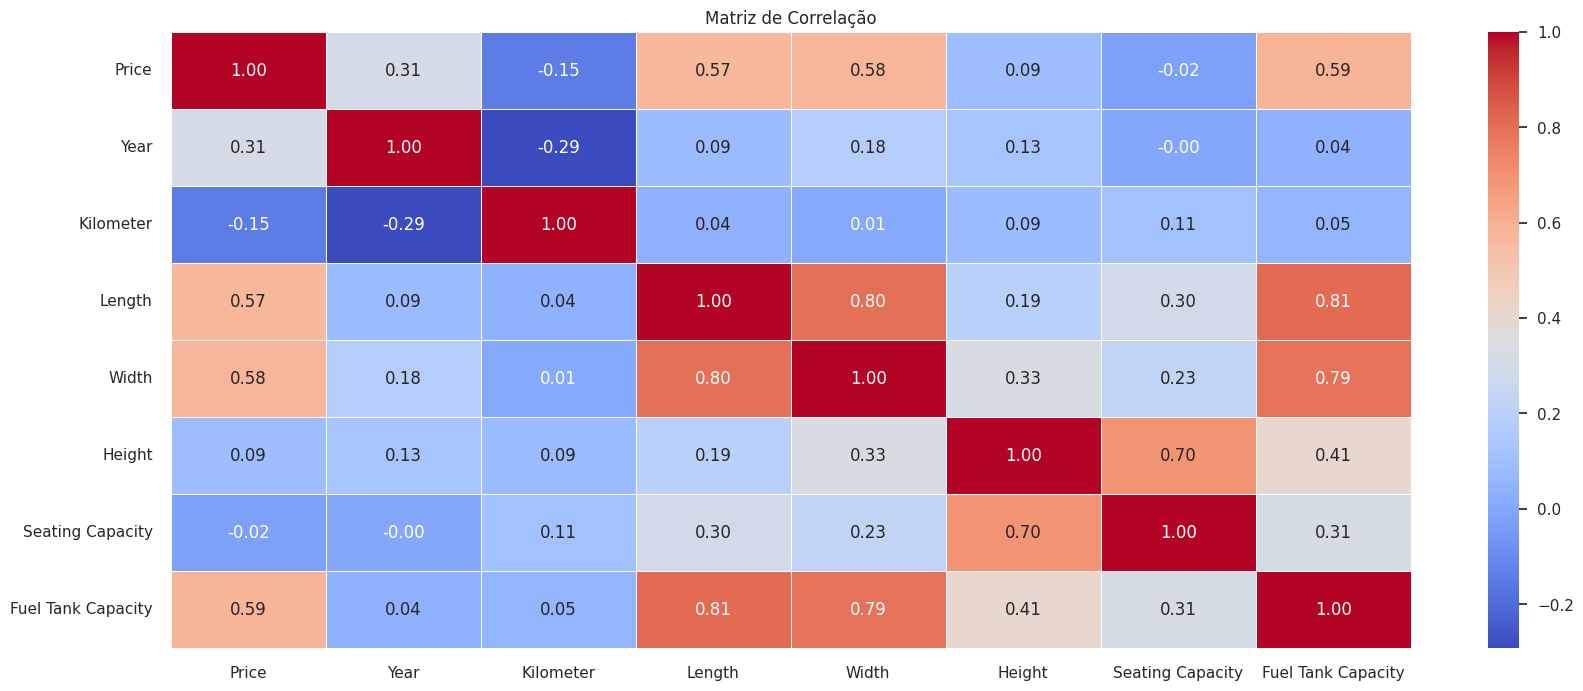

In [290]:
# Seleciona variáveis numéricas
df_num_cars = df_cars.select_dtypes(include=['float64', 'int64'])

# Calcula matriz de correlação
corr_cars = df_num_cars.corr()

# Plot
plt.figure(figsize=(20, 8))
sns.heatmap(corr_cars, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

#### **Conclusão:**

# Correlações:
A correlação positiva indica que, quando uma variável aumenta, a outra tende a aumentar também, demonstrando um comportamento semelhante entre as duas variáveis.

A correlação negativa, por outro lado, demonstra o oposto da correlação positiva, ou seja, o aumento de uma variável corresponde à diminuição de outra.

Por fim, a correlação neutra indica que não há uma tendência clara entre as duas variáveis analisadas.

Dessa forma, é possível observar em nosso conjunto de dados:

## Correlações Positivas:

- **Comprimento (Length) x Capacidade do Tanque de Combustível (Fuel Tank Capacity) `[0.81]`:**
  
  Isso indica que à medida que o comprimento do carro aumenta, a capacidade do tanque de combustível tende a aumentar também. Isso pode ser devido ao fato de que carros maiores têm mais espaço para acomodar um tanque de combustível maior.

- **Comprimento (Length) x Largura (Width) `[0.80]`:**
  
  Aqui, observamos que o comprimento do carro e a largura têm uma forte correlação positiva. Quando o comprimento aumenta, a largura também tende a aumentar. Isso faz sentido, já que carros maiores geralmente têm dimensões maiores em todas as direções.

## Correlações Negativas:

- **Ano (Year) x Quilometragem (Kilometer) `[-0.29]`:**

  Esta correlação negativa sugere que à medida que o ano de fabricação do carro aumenta, a quilometragem tende a diminuir. Isso é esperado, já que carros mais novos geralmente têm menos quilômetros rodados em comparação com carros mais antigos.

- **Preço (Price) x Quilometragem (Kilometer) `[-0.15]`:**

  Aqui, vemos que o preço do carro e a quilometragem têm uma correlação negativa. Isso significa que, em geral, carros com menor quilometragem tendem a ter preços mais altos.

## Correlações Neutras:

- **Capacidade de Assentos (Seating Capacity) x Ano (Year) `[0.00]`:**

  Essa correlação neutra sugere que não há uma relação clara entre a capacidade de assentos de um carro e o ano de fabricação. Em outras palavras, o número de assentos não parece ser influenciado pelo ano do carro.

- **Largura (Width) x Quilometragem (Kilometer) `[0.01]`:**

  Esta correlação neutra indica que não há uma forte relação entre a largura do carro e a quilometragem percorrida. Ou seja, a largura do carro não parece ser afetada significativamente pela quantidade de quilômetros rodados.

### Exercício 08.

**Codifique e exiba gráficos de dispersão para cada uma das variáveis numéricas em relação à variável de interesse preço (`price`).**

#### Código:

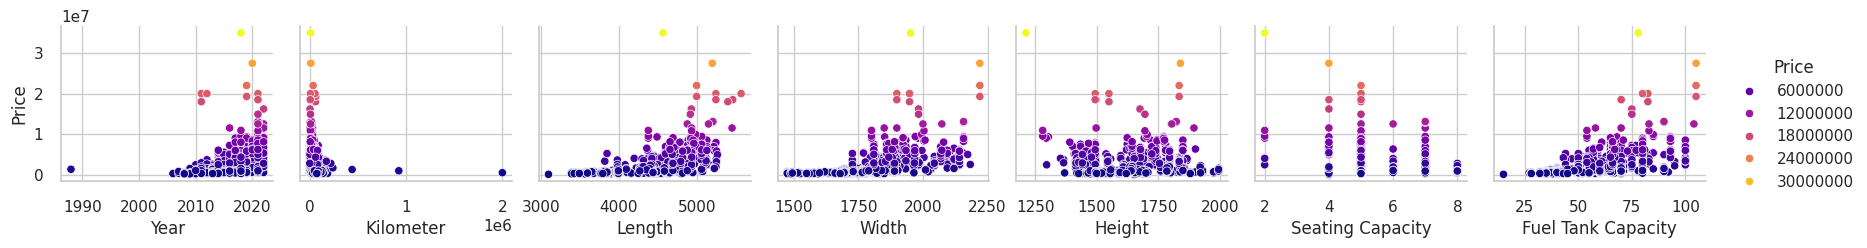

In [291]:
sns.pairplot(df_num_cars, y_vars='Price',  palette = 'plasma', hue='Price')

### Exercício 09.

**Crie um modelo de regressão linear simples, exiba a tabela de regressão, exiba o gráfico da reta estimada e exiba o gráfico dos resíduos.**

#### Código - Funções:

In [292]:
def Tratar_outliers(df, variavel, fator):
  # Calcular as medidas estatísticas
  Q1 = df[variavel].quantile(0.25)
  Q3 = df[variavel].quantile(0.75)
  IQR = Q3 - Q1

  # Definir o critério para outliers
  lower_threshold = Q1 - fator * IQR
  upper_threshold = Q3 + fator * IQR

  # Identificar outliers
  outliers = df[(df[variavel] < lower_threshold) | (df[variavel] > upper_threshold)]

  # Remover outliers do Dataframe
  df = df.drop(outliers.index)

  # Exibir a quantidade de outliers removidos
  print(f'Quantidade de outliers removidos para variável {variavel}: {len(outliers)}.\n')
  # Retornar DataFrame modificado
  return df

def Gerar_regressao_e_grafico(df, variavel, variavel_titulo):
  # Passo 1: Modelo de regressão
  X = sm.add_constant(df[variavel])
  y = df['Price']
  model = sm.OLS(y, X).fit()

  # Passo 2: Visualização da Tabela de Regressão
  print(model.summary())
  print('\n')

  # Passo 3: Gráfico da reta estimada
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(10, 5))

  sns.scatterplot(data=df, x=variavel, y='Price',  hue='Price', palette='plasma', alpha=0.7)
  sns.regplot(data=df, x=variavel, y='Price', scatter=False, color='red')
  plt.title(f'Regressão - Preço do Veículo vs {variavel_titulo}')
  plt.xlabel(variavel_titulo)
  plt.ylabel('Preço do Veículo')
  plt.legend(title='Faixas de Preço')
  plt.grid(True, linestyle=':')
  plt.tight_layout()
  plt.show()
  print('\n')

  # Passo 3: Gráfico de Resíduos
  residuals        = model.resid
  predicted_values = model.fittedvalues

  plt.figure(figsize=(10, 5))
  plt.scatter(x=predicted_values, y=residuals, alpha=0.7, color='#4b2aa3')
  plt.axhline(y=0, color='red', linestyle='--')
  plt.title('Gráfico de Resíduos')
  plt.xlabel('Valores Ajustados')
  plt.ylabel('Resíduos')
  plt.grid(True, linestyle=':')
  plt.tight_layout()
  plt.show()

#### Variável: Ano de Fabricação do Veículo (`Year`)

Quantidade de outliers removidos para variável Year: 1.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.30e-44
Time:                        23:53:47   Log-Likelihood:                -30096.
No. Observations:                1873   AIC:                         6.020e+04
Df Residuals:                    1871   BIC:                         6.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

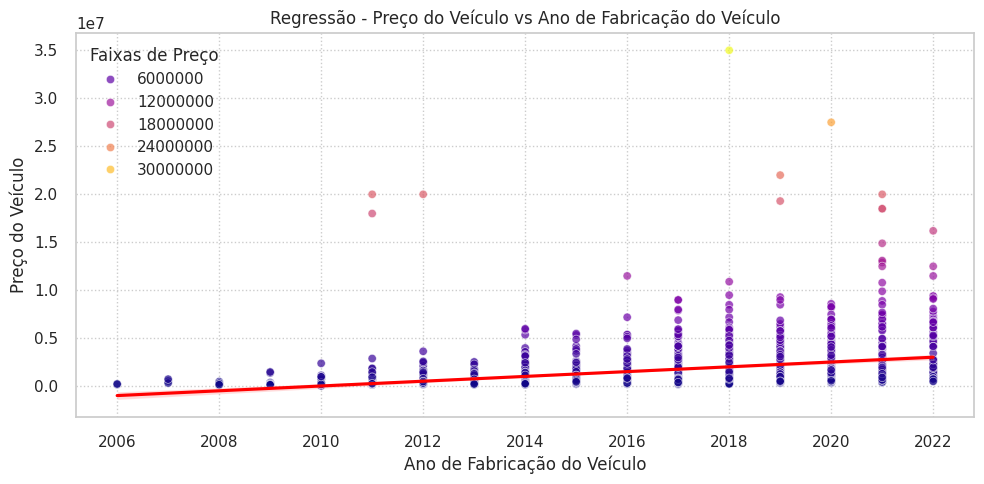

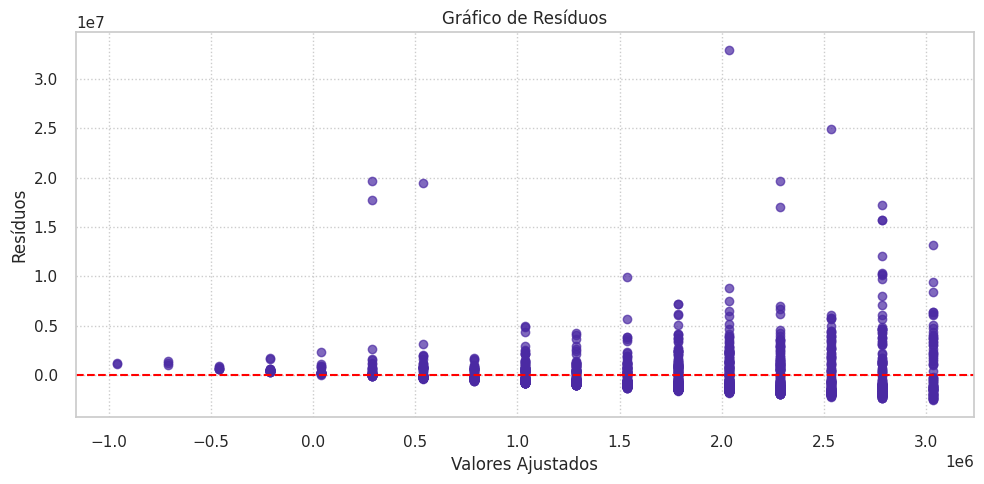

In [293]:
# Tratamento de outliers
df_num_cars_Year = Tratar_outliers(df_num_cars, 'Year', 3)

# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars_Year, 'Year', 'Ano de Fabricação do Veículo')

#### Variável: Kilometragem do Veículo (`Kilometer`)

Quantidade de outliers removidos para variável Kilometer: 6.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.46e-31
Time:                        23:53:49   Log-Likelihood:                -30047.
No. Observations:                1868   AIC:                         6.010e+04
Df Residuals:                    1866   BIC:                         6.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

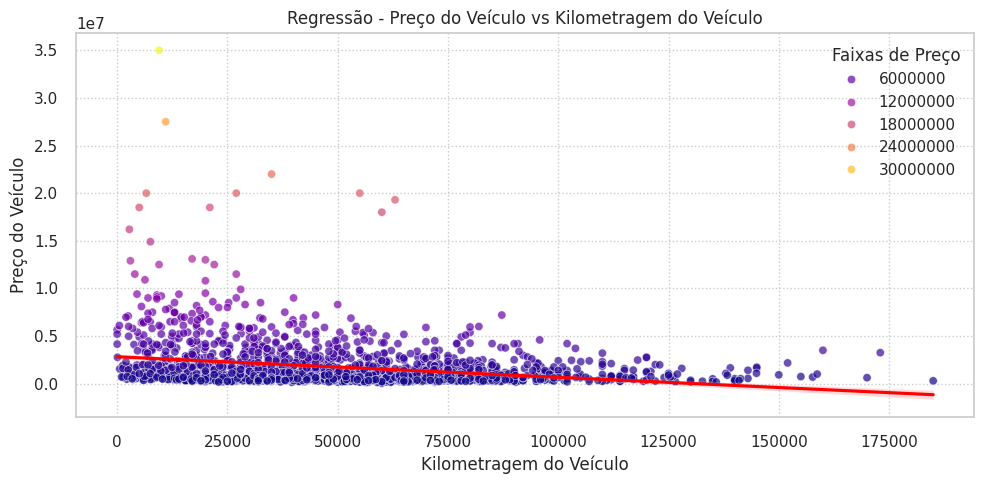

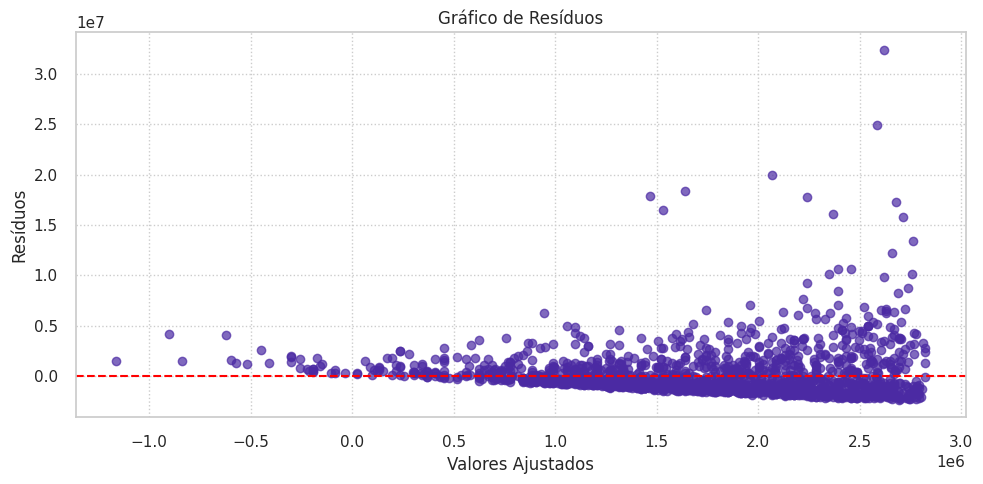

In [294]:
# Tratamento de outliers
df_num_cars_Kilometer = Tratar_outliers(df_num_cars, 'Kilometer', 3)

# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars_Kilometer, 'Kilometer', 'Kilometragem do Veículo')

#### Variável: Comprimento do Veículo (`Length`)

Quantidade de outliers removidos para variável Length: 0.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     895.7
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.71e-161
Time:                        23:53:51   Log-Likelihood:                -29843.
No. Observations:                1874   AIC:                         5.969e+04
Df Residuals:                    1872   BIC:                         5.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

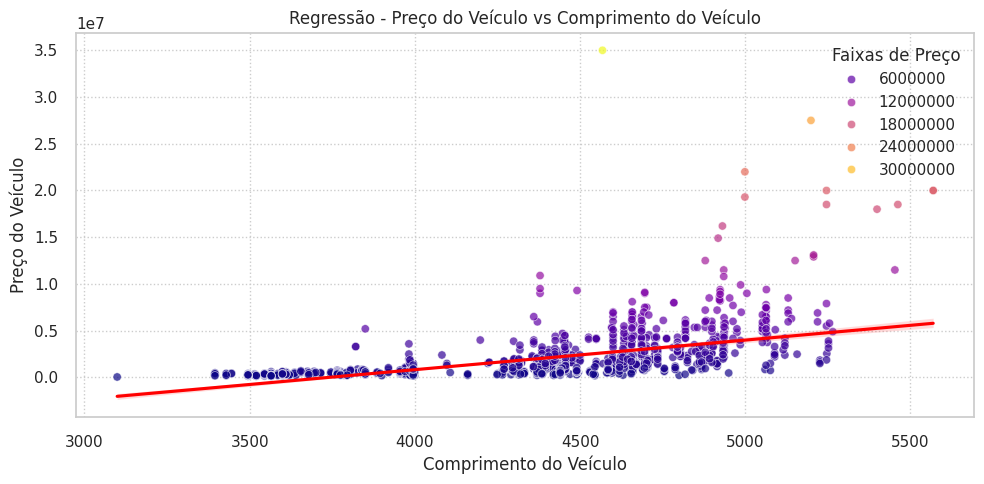

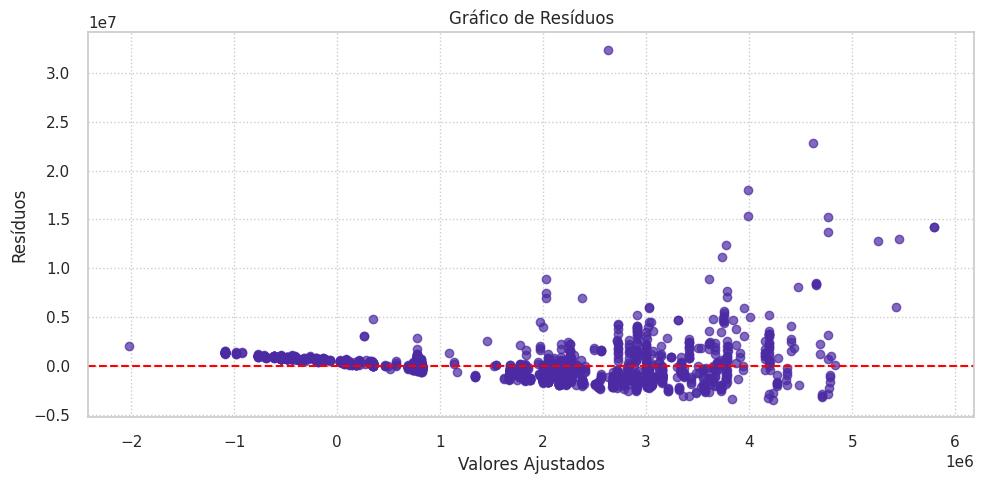

In [295]:
# Tratamento de outliers
df_num_cars_Length = Tratar_outliers(df_num_cars, 'Length', 1.5)

# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars_Length, 'Length', 'Comprimento do Veículo')

#### Variável: Largura do Veículo (`Width`)

Quantidade de outliers removidos para variável Width: 5.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     905.2
Date:                Mon, 13 May 2024   Prob (F-statistic):          1.74e-162
Time:                        23:53:52   Log-Likelihood:                -29635.
No. Observations:                1869   AIC:                         5.927e+04
Df Residuals:                    1867   BIC:                         5.929e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

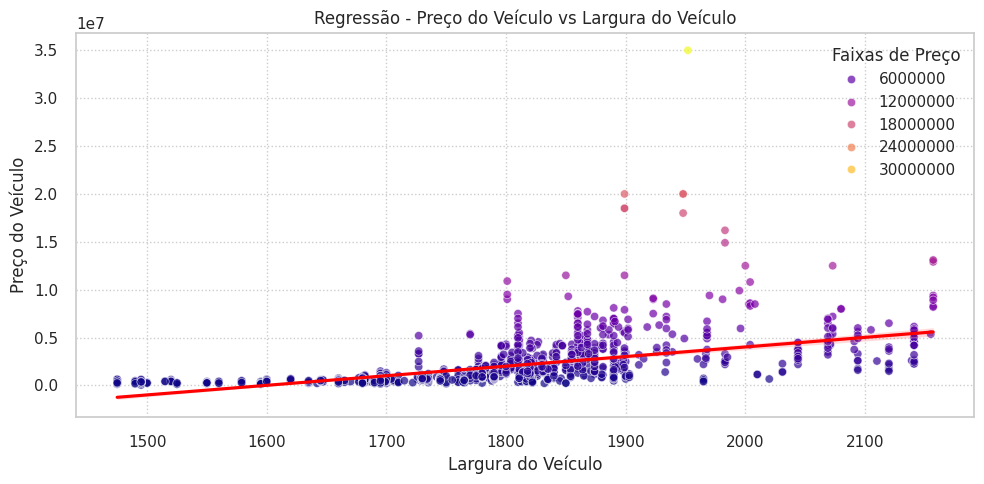

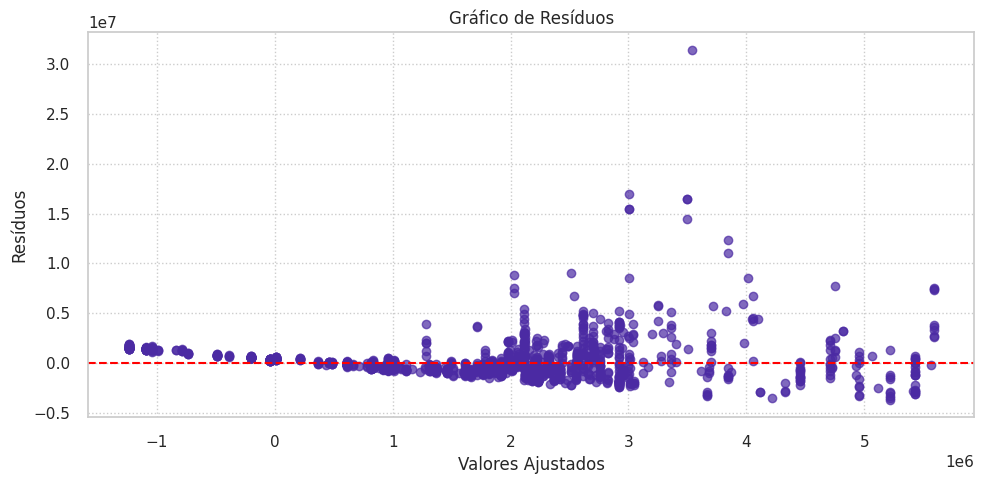

In [296]:
# Tratamento de outliers
df_num_cars_Width = Tratar_outliers(df_num_cars, 'Width', 2.5)

# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars_Width, 'Width', 'Largura do Veículo')

#### Variável: Altura do Veículo (`Height`)

Quantidade de outliers removidos para variável Height: 0.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     16.32
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.56e-05
Time:                        23:53:54   Log-Likelihood:                -30202.
No. Observations:                1874   AIC:                         6.041e+04
Df Residuals:                    1872   BIC:                         6.042e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

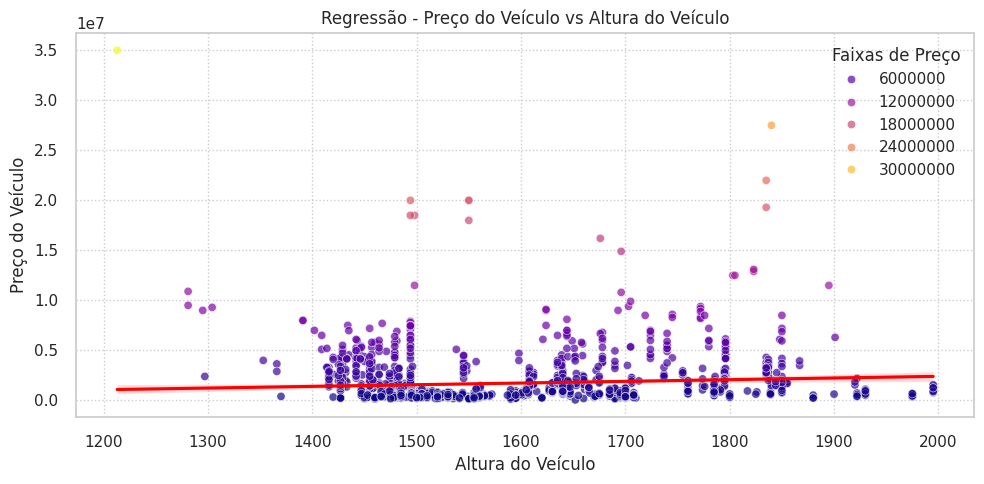

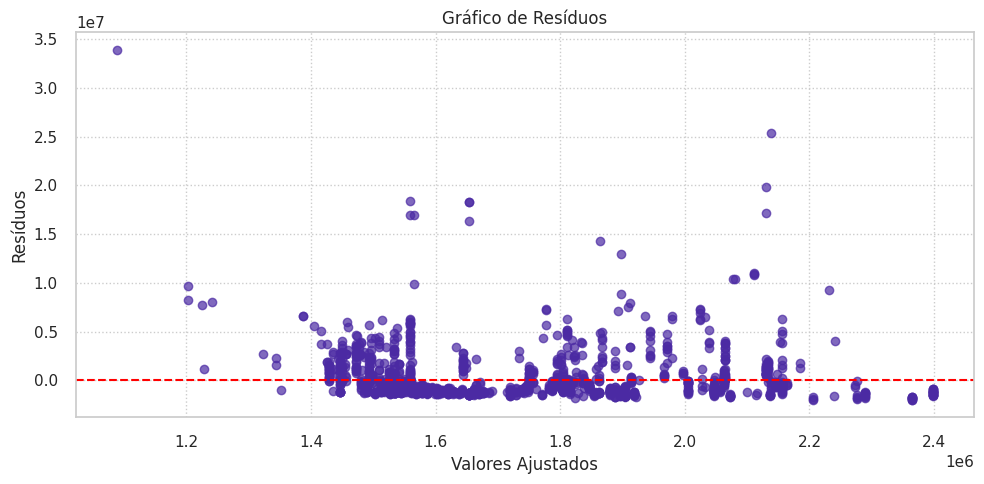

In [297]:
# Tratamento de outliers
df_num_cars_Height = Tratar_outliers(df_num_cars, 'Height', 3)

# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars_Height, 'Height', 'Altura do Veículo')

#### Variável: Quantidade de Assentos (`Seating Capacity`)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.159
Date:                Mon, 13 May 2024   Prob (F-statistic):              0.282
Time:                        23:53:55   Log-Likelihood:                -30209.
No. Observations:                1874   AIC:                         6.042e+04
Df Residuals:                    1872   BIC:                         6.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.114e+06   3.72e+05  

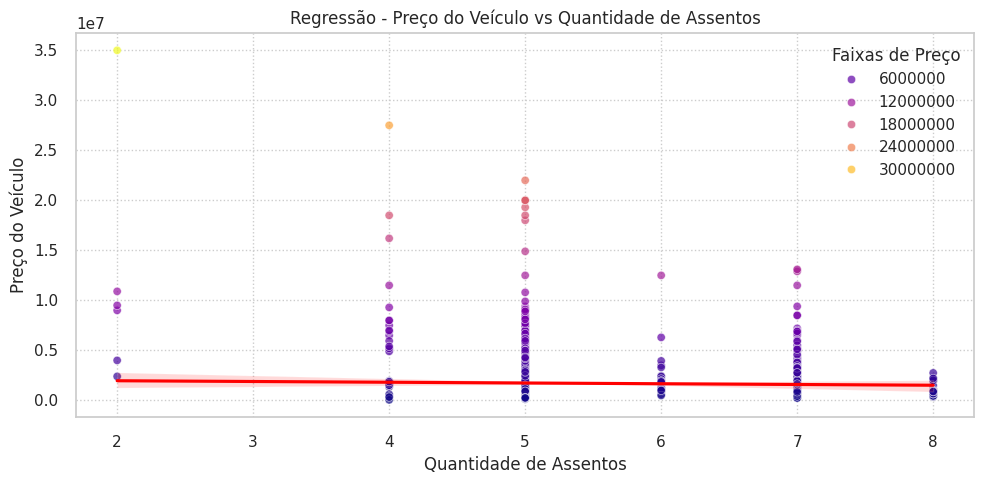

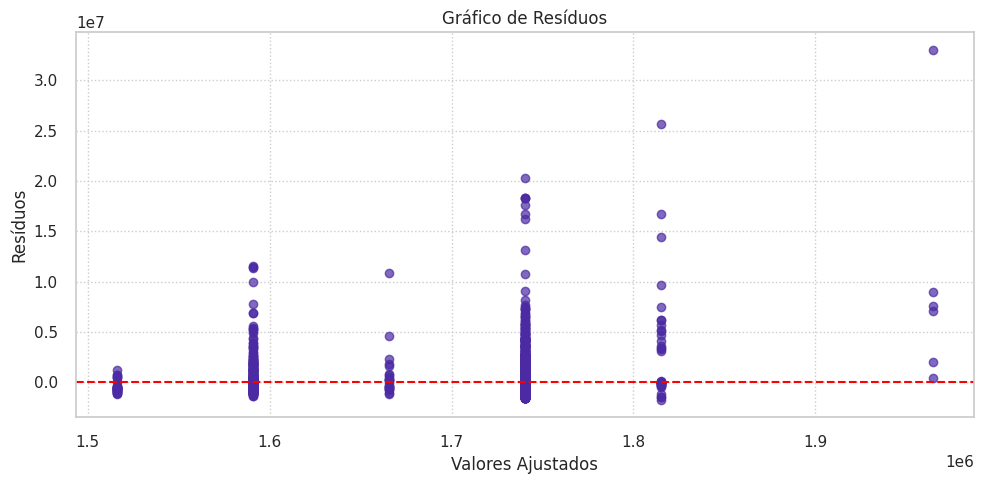

In [298]:
# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars, 'Seating Capacity', 'Quantidade de Assentos')

#### Variável: Capacidade do Tanque de Combustível (`Fuel Tank Capacity`)

Quantidade de outliers removidos para variável Fuel Tank Capacity: 19.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     929.9
Date:                Mon, 13 May 2024   Prob (F-statistic):          7.21e-166
Time:                        23:53:56   Log-Likelihood:                -29385.
No. Observations:                1855   AIC:                         5.877e+04
Df Residuals:                    1853   BIC:                         5.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

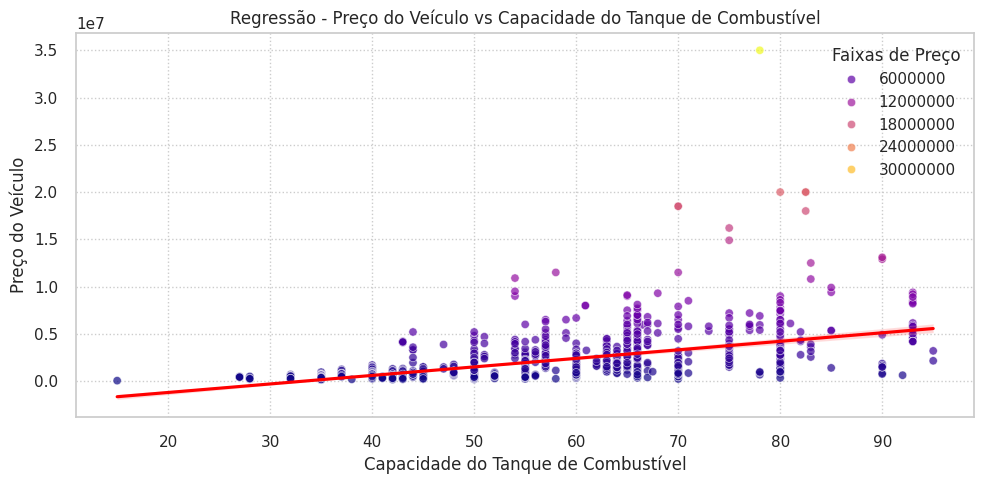

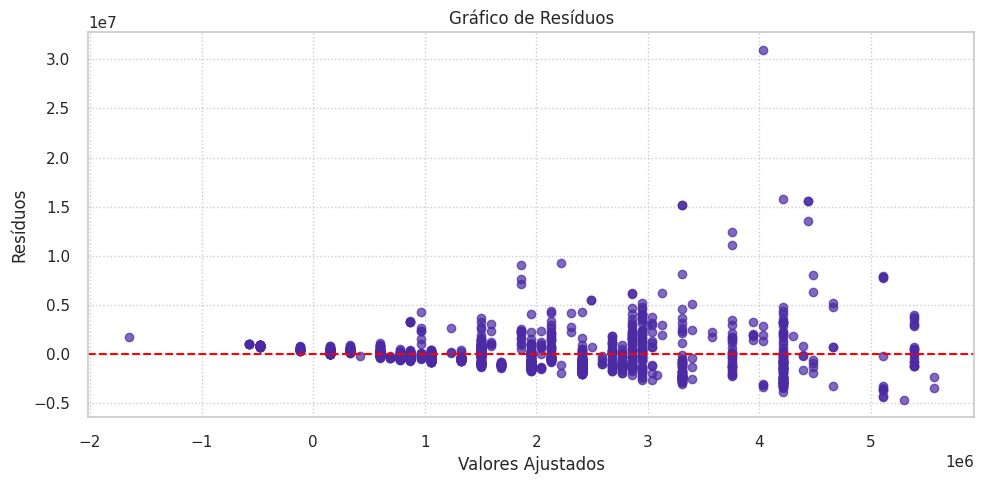

In [299]:
# Tratamento de outliers
df_num_cars_FuelTank = Tratar_outliers(df_num_cars, 'Fuel Tank Capacity', 2)

# Tabela de Regressão e Gráfico da Reta Estimada
Gerar_regressao_e_grafico(df_num_cars_FuelTank, 'Fuel Tank Capacity', 'Capacidade do Tanque de Combustível')

### Exercício 10.

**Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.**

#### Código:

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Mon, 13 May 2024   Prob (F-statistic):          1.49e-278
Time:                        23:53:58   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

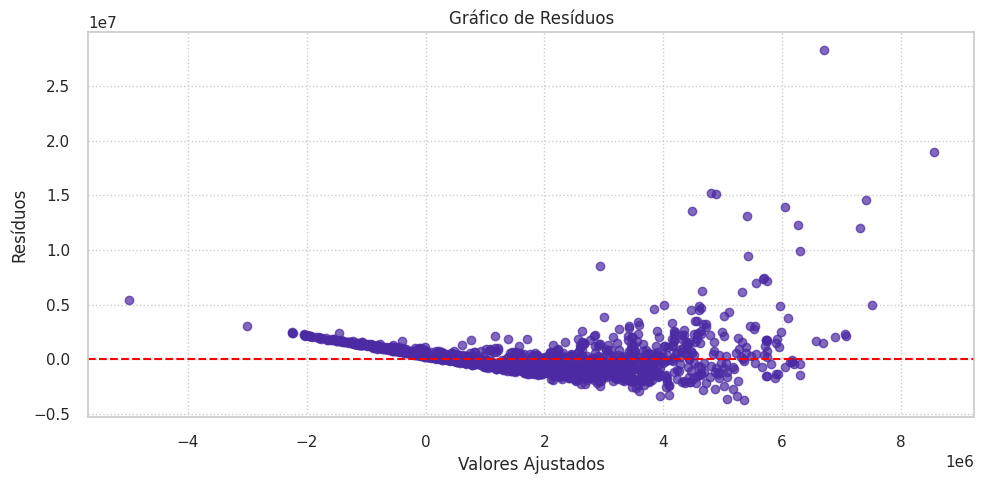

In [300]:
# Passo 1: Modelo de regressão
X = sm.add_constant(df_num_cars.drop(columns='Price'))
y = df_num_cars['Price']  # Variável dependente
model = sm.OLS(y, X).fit()

# Passo 2: Visualização da Tabela de Regressão
print(model.summary())

# Passo 3: Gráfico de Resíduos
residuals        = model.resid
predicted_values = model.fittedvalues

plt.figure(figsize=(10, 5))
plt.scatter(x=predicted_values, y=residuals, alpha=0.7, color='#4b2aa3')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

#### **Conclusão:**

Com base nos resultados do modelo de regressão linear multivariada, o coeficiente de correlação (R-quadrado) de 0.504 revela que cerca de 50.4% da variação nos preços dos veículos (`Price`) é explicada pelas variáveis independentes do modelo. Isso sugere uma relação moderada entre as variáveis, mas o R-quadrado sozinho não determina a força dessas conexões.

Os p-valores dos coeficientes indicam a importância estatística das variáveis no modelo. Um valor-p abaixo de 0.05 geralmente é considerado significativo. Entretanto, a Altura do Veículo (`Height`) não apresenta significância estatística, com um valor-p de 0.500.

Além disso, ao examinar o gráfico de resíduos, notamos um padrão enviesado, sugerindo que o modelo pode não capturar completamente a estrutura dos dados. Idealmente, os resíduos devem estar dispersos aleatoriamente, formando uma nuvem ao redor da linha zero.

Dessa forma, considerando essas observações, pode-se concluir que o modelo de regressão linear pode não ser a melhor abordagem para explicar a relação entre as variáveis independentes e a variável de interesse neste caso específico.